# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd
import numpy as np

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



# imports for models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_score
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn import preprocessing
import time



In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
# Encode the target column 'y'
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
#check for duplicates and drop them
df.duplicated().sum()

df.drop_duplicates(inplace=True)

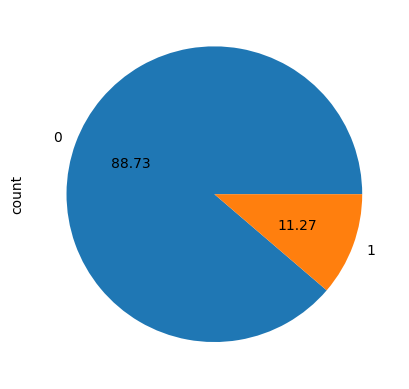

In [ ]:
#client subscribed a term deposit? (binary: 'yes','no')
df['y'].value_counts(normalize=True)
df['y'].value_counts().plot.pie(autopct="%.2f");

#Target value distribution

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Text(0.5, 1.1, 'Box plots for numerical features to examine their distribution')

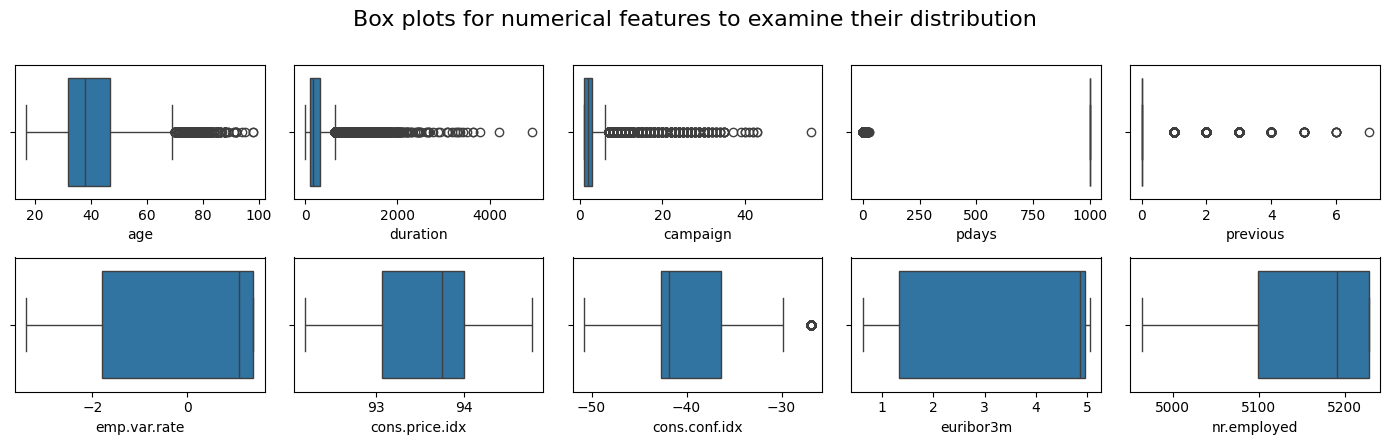

In [ ]:
# create box plots for numerical features to examine their distribution.

#List to store the names of numerical columns
num_column_lst = []
for icol in df.columns:
    #if column data type is either float64 or int64.
    if df[icol].dtypes in ['float64', 'int64']:
      #numerical ? added to the num_column_lst
        num_column_lst.append(icol)
print(num_column_lst)

fig, axs = plt.subplots(nrows = 2, ncols=5, figsize = (14,4))
#Iterates over the numerical column names and corresponding subplot axes
for name,ax in zip(num_column_lst,axs.flatten()):
    # box plot for each numerical column in the corresponding subplot
    sns.boxplot(data=df,x=name,ax=ax)
  # plt.show()
fig.tight_layout()
fig.suptitle('Box plots for numerical features to examine their distribution',y=1.1,fontsize=16)

**Duration: Duration of calls is long and is not well distributed.**

**campaign: Majority of contacts respond within the first few attempts.**

**pdays: It seems irrelevant.**

**previous: This too seems very little data.**

Since these are not well distributed we will drop them.

Text(0.5, 1.05, 'Histplot of Numerical Features')

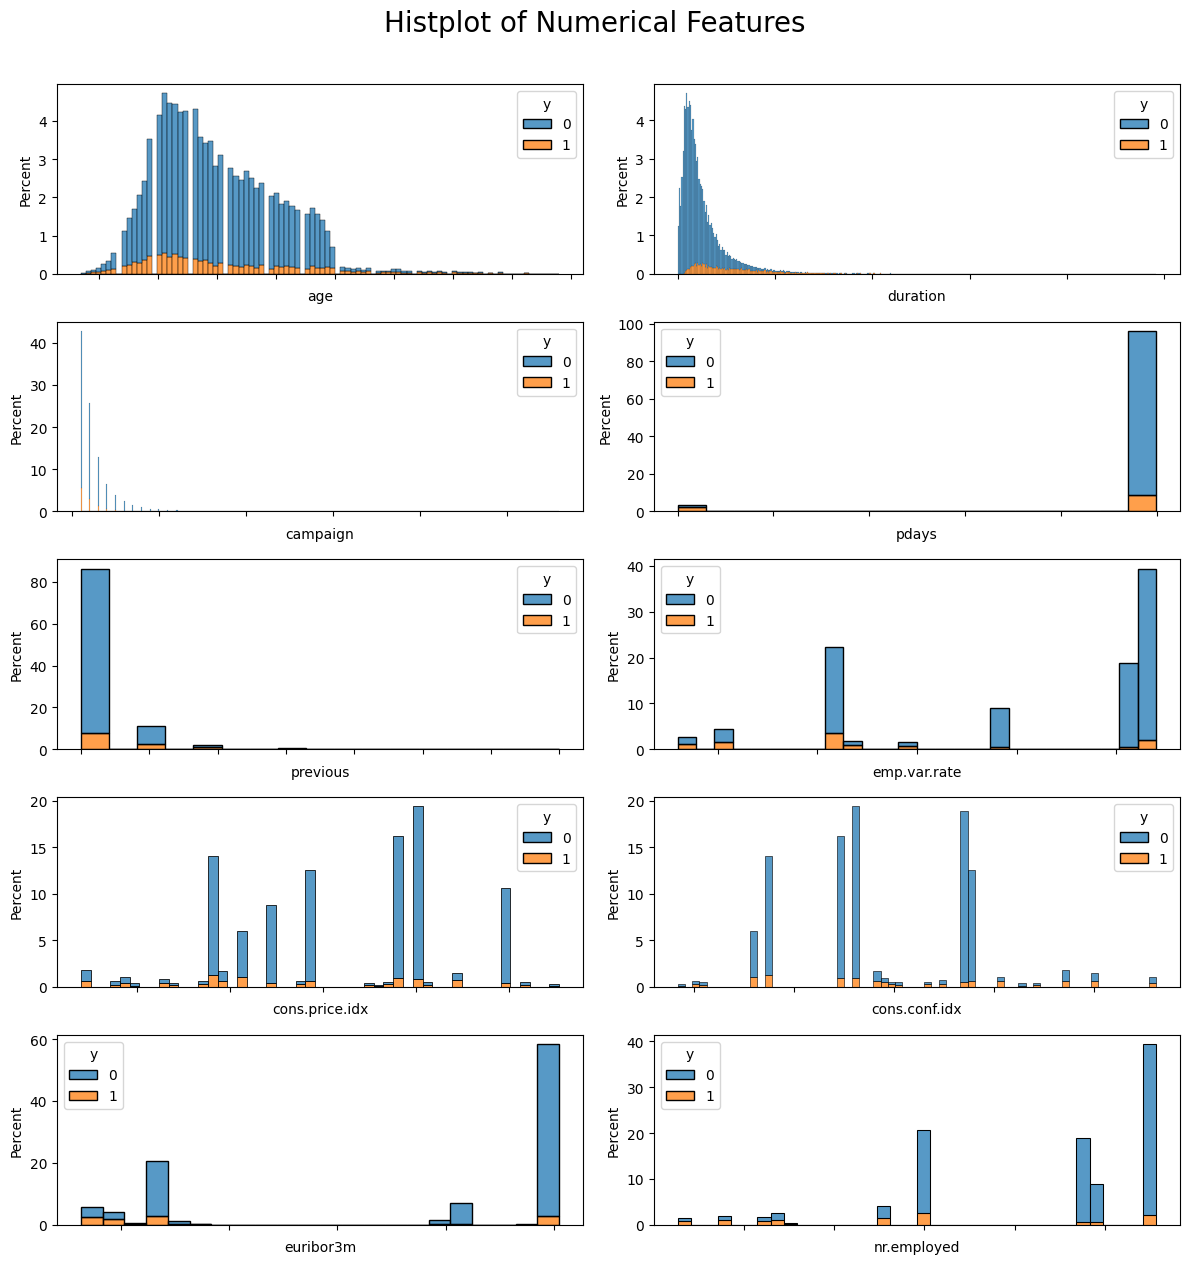

In [ ]:
# Distribution Plot of the Numerical features
fig, axs = plt.subplots(nrows = 5, ncols=2, figsize = (12,12))
for name,ax in zip(num_column_lst,axs.flatten()):
    sns.histplot(data=df,x=name,ax=ax,hue='y',multiple='stack',stat='percent')
    ax.set_xticklabels(ax.get_xticklabels(minor=True,which='minor'),rotation=0,fontsize=50)

fig.tight_layout()
fig.suptitle('Histplot of Numerical Features',y=1.05,fontsize=20)

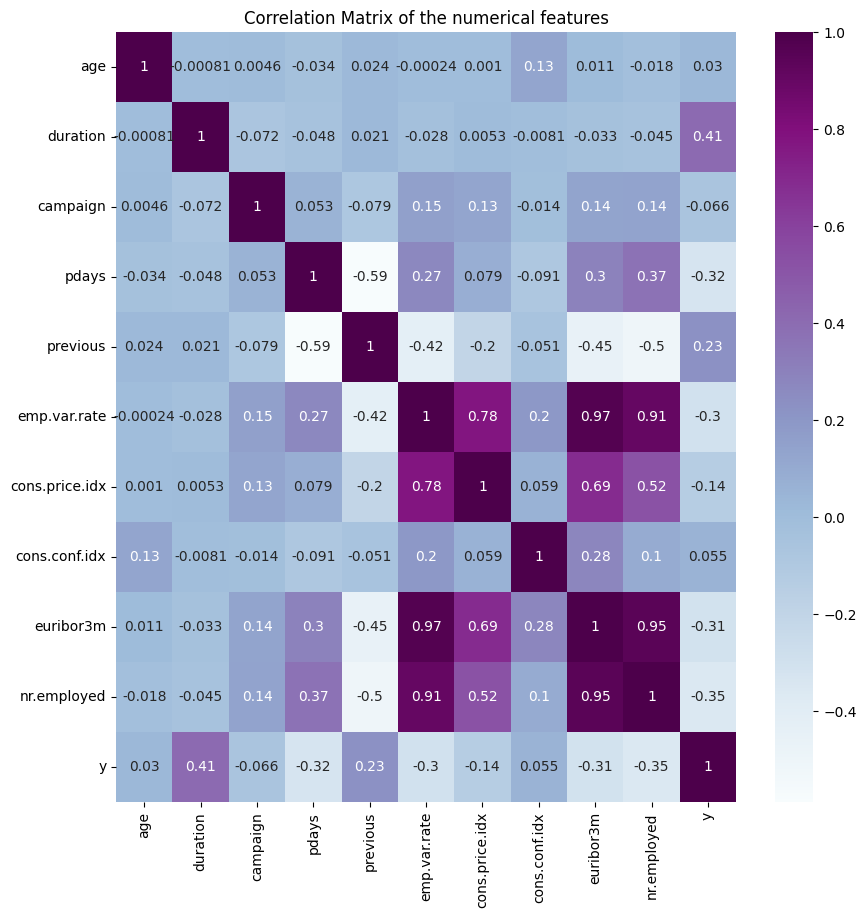

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='BuPu')
plt.title('Correlation Matrix of the numerical features')
plt.show()

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


Text(0.5, 1.05, 'Distribution of Categorical variables')

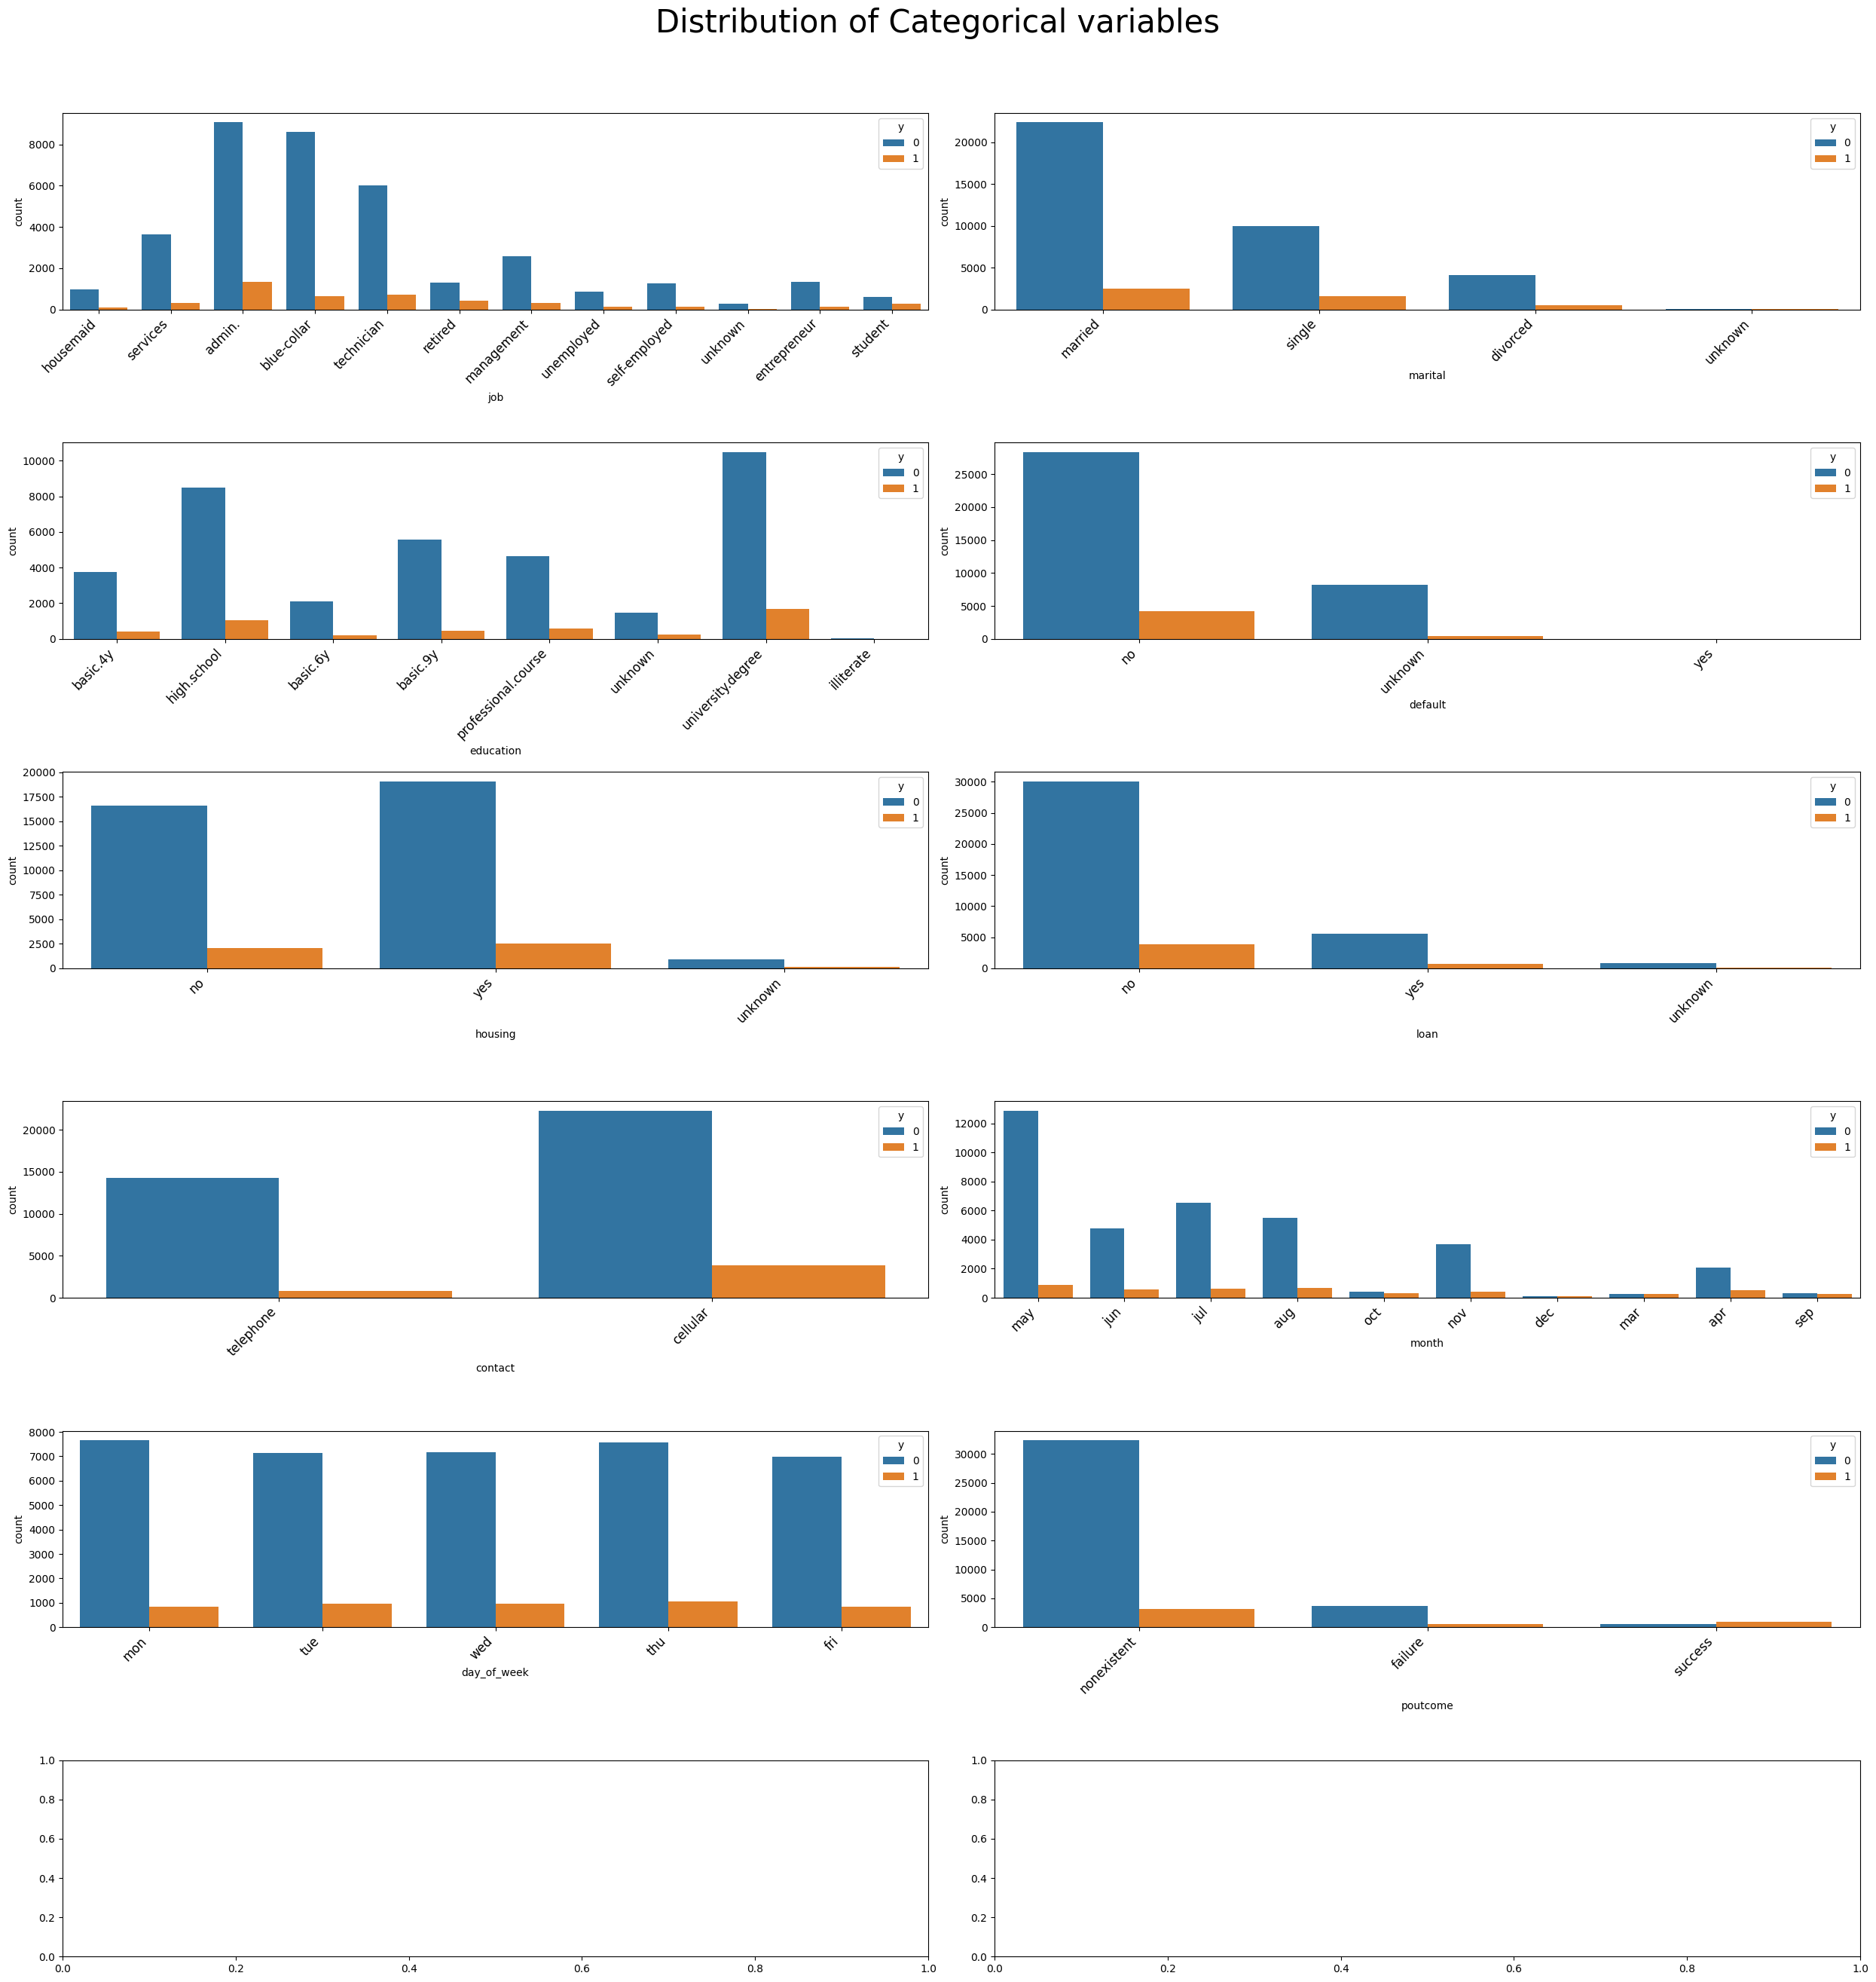

In [ ]:
# Distribution of the categorical features
cat_column_lst = []

for icol in df.columns:
    if df[icol].dtypes in ['object']:
        cat_column_lst.append(icol)
print(cat_column_lst)

fig, axs = plt.subplots(nrows = 6, ncols=2, figsize = (25,25))
for name,ax in zip(cat_column_lst,axs.flatten()):
    sns.countplot(data=df,x=name,ax=ax,hue='y')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)

fig.tight_layout()
fig.suptitle('Distribution of Categorical variables',y=1.05,fontsize=30)


--> emp.var.rate, euribor3m, and nr.employed: Strong positive correlation. As
employment variation rate increases, both Euribor 3-month rate and number of employees tend to increase, indicating a relationship between employment, interest rates, and employment levels.

--> emp.var.rate and cons.price.idx: Moderate positive correlation. Higher employment variation rate is associated with an increase in the consumer price index, suggesting a link between employment variation and inflation.

--> euribor3m and cons.price.idx: Moderate positive correlation. An increase in the Euribor 3-month rate is linked to a rise in the consumer price index, indicating a relationship between interest rates and inflation.

--> cons.conf.idx: No strong linear correlation with other macroeconomic variables. Scatterplots show random patterns, suggesting consumer confidence is not strongly related to the other factors.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business Objective

The objective is to leverage the dataset provided by a Portuguese bank, which includes information from past direct marketing campaigns. This dataset encompasses various campaigns and over 79k+ contacts. Our goal is to develop a model that can predict the success of these marketing campaigns. Success, in this context, is defined as the number of people who agree to purchase the product (a long-term deposit with favorable interest rates).

To achieve this, we will compare the following classification methods:


*   K-nearest neighbors (KNN)
*   Logistic Regression (LR)
*   Decision Trees (DT)
*   Support Vector Machines (SVM)






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
# Dataframe with the relevant features
df_relevant = df[['age','job','marital','education','default','housing','loan','y']]

print(df_relevant.shape)
df_relevant.head()

(41176, 8)


,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,0
1,57,services,married,high.school,unknown,no,no,0
2,37,services,married,high.school,no,yes,no,0
3,40,admin.,married,basic.6y,no,no,no,0
4,56,services,married,high.school,no,no,yes,0


In [ ]:
le = preprocessing.LabelEncoder()
df_relevant.loc[:, 'y'] = le.fit_transform(df_relevant['y'])
df_relevant.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,0
1,57,services,married,high.school,unknown,no,no,0
2,37,services,married,high.school,no,yes,no,0
3,40,admin.,married,basic.6y,no,no,no,0
4,56,services,married,high.school,no,no,yes,0


In [ ]:
#Sets up a preprocessing pipeline where categorical columns are one-hot encoded, the 'age' column is standardized, and all other columns are left unchanged.
#The transformer is then fitted to the dataset X.

X = df_relevant[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
y = df_relevant['y']

column_transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['job', 'marital', 'education',
                                       'default', 'education',
                                       'housing', 'loan']),
    ([StandardScaler(), ['age']]),

    remainder='passthrough'
)

column_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['job', 'marital', 'education', 'default',
                                  'education', 'housing', 'loan']),
                                ('standardscaler', StandardScaler(), ['age'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# Create X & y by splitting the data into a 70/30 split
X = df_relevant.drop(columns = 'y')
y = df_relevant['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
results_df = pd.DataFrame({'Simple_lgr': [],
                            'logistic_regression': [],
                           'knn': [],
                           'svm': [],
                           'dtree': []},
                          columns=['ROC_AUC','Accuracy', 'F1', 'Precision', 'Recall'])

results_df

,ROC_AUC,Accuracy,F1,Precision,Recall


In [ ]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')
start = time.time()
dummy_clf.fit(X_train, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['Baseline_Model', 'Fit Time'] = fit_time

results_df

,ROC_AUC,Accuracy,F1,Precision,Recall,Fit Time
Baseline_Model,NaN,NaN,NaN,NaN,NaN,0.0s


Unique values in y_test: [0 1]
Unique values in y_hat: [0]
ROC_AUC Score for Baseline =               precision    recall  f1-score   support

           0       0.88      1.00      0.94      9094
           1       0.00      0.00      0.00      1200

    accuracy                           0.88     10294
   macro avg       0.44      0.50      0.47     10294
weighted avg       0.78      0.88      0.83     10294

False Positive :  [0. 1.]
True Positive :  [0. 1.]


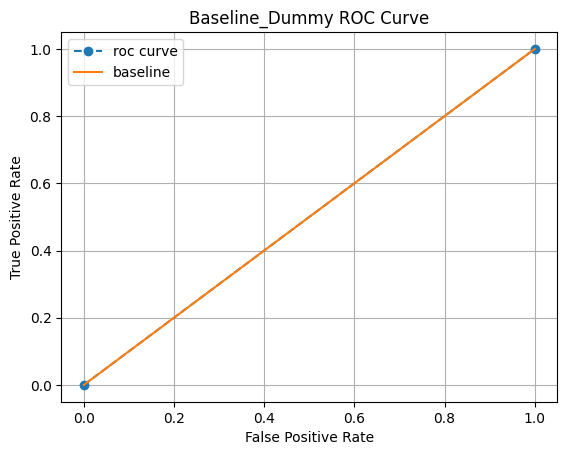

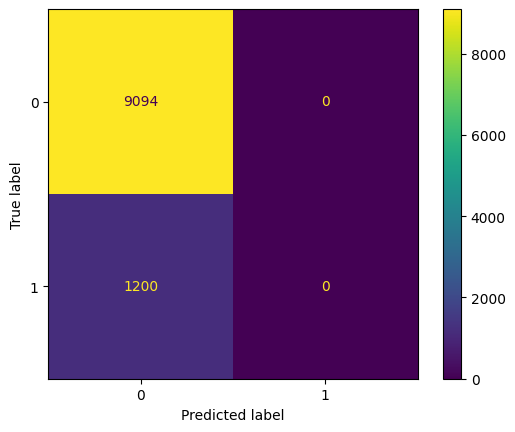

In [ ]:
# Standardized Print out for all relevant scores and performance metrics

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

y_hat = dummy_clf.predict(X_test)
y_hat_probs = dummy_clf.predict_proba(X_test)

# Ensure predictions align with the classes in y_test
if len(np.unique(y_hat)) == 1:
    y_hat = np.full_like(y_test, fill_value=y_train.mode()[0])  # All predictions are the majority class


# Check unique values for consistency
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_hat:", np.unique(y_hat))

# Generate the classification report
baseline_scores = classification_report(y_test, y_hat)

#print(baseline_scores)

#Receiver Operating Characteristic
baseline_Operating_Characteristic_scores = classification_report(y_test, y_hat, labels=[0, 1], zero_division=0)
print(f'ROC_AUC Score for Baseline = {baseline_Operating_Characteristic_scores}')

# display Receiver Operating Characteristic  graph and confusion matrix

fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive : ', fpr[:5])
print('True Positive : ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Baseline_Dummy ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['Baseline_Model', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'ROC_AUC'] = baseline_Operating_Characteristic_scores
results_df.loc['Baseline_Model', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['Baseline_Model', 'Recall'] = recall_score(y_test, y_hat)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
X_train_simple = column_transformer.transform(X_train)
X_test_simple = column_transformer.transform(X_test)

simple_lgr = LogisticRegression()

start = time.time()
simple_lgr.fit(X_train_simple, y_train)
stop = time.time()

fit_time = str(round(stop-start,2))+'s'
#add fit time to the results table
results_df.loc['Simple_lgr', 'Fit Time'] = fit_time

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9094
           1       0.00      0.00      0.00      1200

    accuracy                           0.88     10294
   macro avg       0.44      0.50      0.47     10294
weighted avg       0.78      0.88      0.83     10294

ROC_AUC Score for Simple Logistic Regressor = 0.6554625302397185
False Positive Rates:  [0.         0.         0.00010996 0.00032989 0.00032989]
True Positive Rates:  [0.         0.00083333 0.00083333 0.00083333 0.00166667]


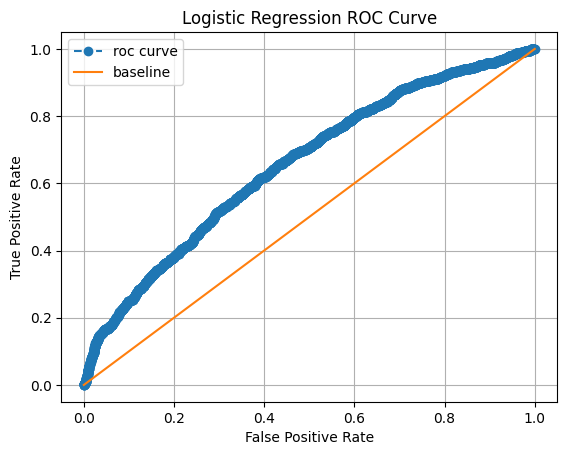

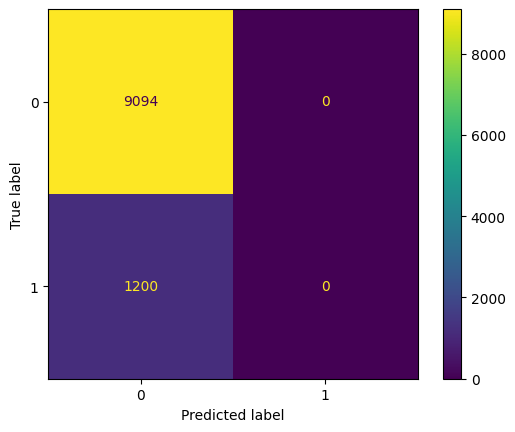

In [ ]:
# print out all relevant scores and performance metrics

y_hat = simple_lgr.predict(X_test_simple)
y_hat_probs = simple_lgr.predict_proba(X_test_simple)

simple_lgr_scores = classification_report(y_test, y_hat)
print(simple_lgr_scores)

simple_lgr_roc_score = roc_auc_score(y_test, y_hat_probs[:, 1])
print(f'ROC_AUC Score for Simple Logistic Regressor = {simple_lgr_roc_score}')


# display roc graph and confusion matrix
fpr, tpr, thresh_rocs = roc_curve(y_test, y_hat_probs[:, 1])
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

# add key results to results_df
results_df.loc['Simple_lgr', 'Accuracy'] = accuracy_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'ROC_AUC'] = simple_lgr_roc_score
results_df.loc['Simple_lgr', 'F1'] = f1_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'Precision'] = precision_score(y_test, y_hat)
results_df.loc['Simple_lgr', 'Recall'] = recall_score(y_test, y_hat)

### Problem 9: Score the Model

What is the accuracy of your model?

ROC_AUC Score for Simple Logistic Regressor = 0.6554625302397185

False Positive Rates:  [0.         0.         0.00010996 0.00032989 0.00032989]

True Positive Rates:  [0.         0.00083333 0.00083333 0.00083333 0.00166667]

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Classification Report for Simple_KNN:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9094
           1       0.35      0.07      0.12      1200

    accuracy                           0.88     10294
   macro avg       0.62      0.53      0.52     10294
weighted avg       0.83      0.88      0.84     10294

ROC_AUC Score for Simple_KNN = 0.5855614507734036
Classification Report for Simple_DecisionTree:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      9094
           1       0.27      0.10      0.15      1200

    accuracy                           0.86     10294
   macro avg       0.58      0.53      0.54     10294
weighted avg       0.82      0.86      0.84     10294

ROC_AUC Score for Simple_DecisionTree = 0.589988866285463
Classification Report for Simple_SVM:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9094
      

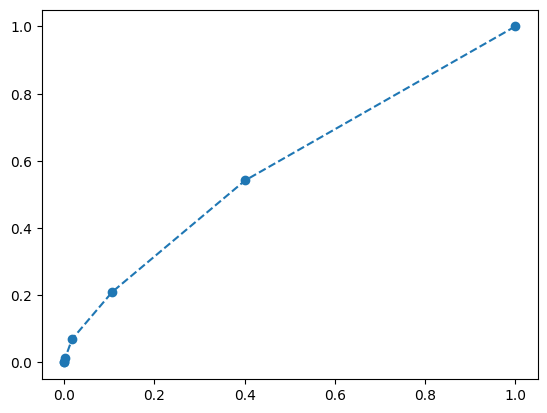

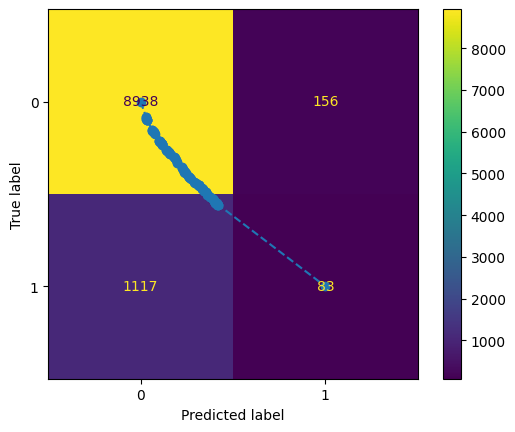

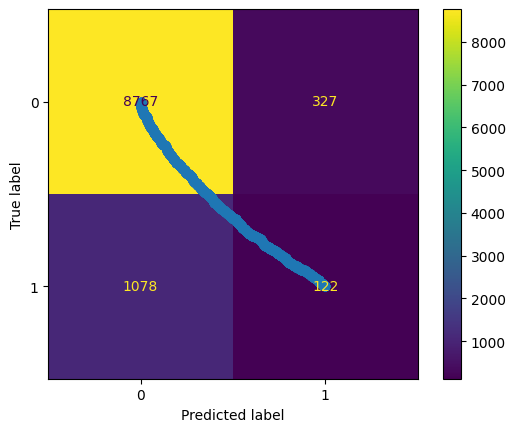

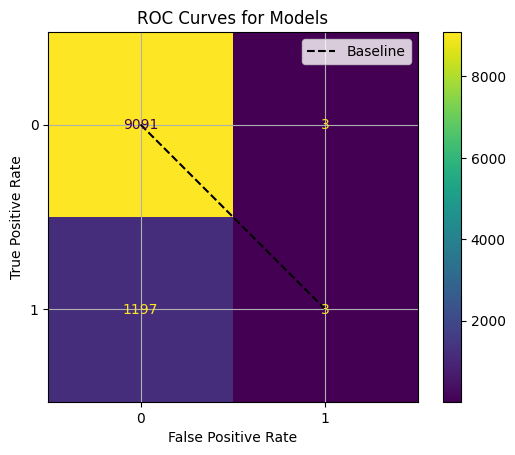

Enhanced Model Comparison Results:
                                                               ROC_AUC  \
Baseline_Model                     precision    recall  f1-score   ...   
Simple_lgr                                                    0.655463   
Simple_SVM                                                    0.597374   
Simple_KNN                                                    0.585561   
Simple_DecisionTree                                           0.589989   

                     Accuracy        F1 Precision    Recall Fit Time  
Baseline_Model       0.883427       0.0       0.0       0.0     0.0s  
Simple_lgr           0.883427       0.0       0.0       0.0    0.04s  
Simple_SVM           0.883427  0.004975       0.5    0.0025  284.58s  
Simple_KNN           0.876336  0.115358   0.34728  0.069167     0.0s  
Simple_DecisionTree  0.863513  0.147968  0.271715  0.101667     0.5s  


In [ ]:
# Transform data using column_transformer
X_train_simple = column_transformer.transform(X_train)
X_test_simple = column_transformer.transform(X_test)

# Models to compare
models = {
    'Simple_KNN': KNeighborsClassifier(),
    'Simple_DecisionTree': DecisionTreeClassifier(),
    'Simple_SVM': SVC(probability=True)
}

for model_name, model in models.items():
    # Fit the model and measure time
    start = time.time()
    model.fit(X_train_simple, y_train)
    stop = time.time()

    fit_time = str(round(stop - start, 2)) + 's'
    results_df.loc[model_name, 'Fit Time'] = fit_time

    # Predict and calculate scores
    y_hat = model.predict(X_test_simple)
    y_hat_probs = model.predict_proba(X_test_simple) if hasattr(model, 'predict_proba') else None

    model_scores = classification_report(y_test, y_hat, output_dict=True)
    roc_score = roc_auc_score(y_test, y_hat_probs[:, 1]) if y_hat_probs is not None else None

    # Print performance metrics
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_hat))
    if roc_score is not None:
        print(f"ROC_AUC Score for {model_name} = {roc_score}")

    # Display ROC curve if applicable
    if y_hat_probs is not None:
        fpr, tpr, _ = roc_curve(y_test, y_hat_probs[:, 1])
        plt.plot(fpr, tpr, '--o', label=f'{model_name} ROC Curve')

    ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

    # Add key results to results_df
    results_df.loc[model_name, 'Accuracy'] = accuracy_score(y_test, y_hat)
    results_df.loc[model_name, 'ROC_AUC'] = roc_score if roc_score is not None else 'N/A'
    results_df.loc[model_name, 'F1'] = f1_score(y_test, y_hat)
    results_df.loc[model_name, 'Precision'] = precision_score(y_test, y_hat)
    results_df.loc[model_name, 'Recall'] = recall_score(y_test, y_hat)

# Finalize the ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.legend()
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

# Display the final results DataFrame
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print("Enhanced Model Comparison Results:")
print(results_df)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Classification Report for KNN (Tuned):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9094
           1       0.35      0.07      0.12      1200

    accuracy                           0.88     10294
   macro avg       0.62      0.53      0.52     10294
weighted avg       0.83      0.88      0.84     10294

ROC_AUC Score for KNN (Tuned) = 0.5855614507734036
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Classification Report for DecisionTree (Tuned):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9094
           1       0.55      0.03      0.05      1200

    accuracy                           0.88     10294
   macro avg       0.72      0.51      0.50     10294
weighted avg       0.85      0.88      0.84     10294

ROC_AUC Score for DecisionTree (Tuned) = 0.6203445495198298
Fitting 5 folds for each of 

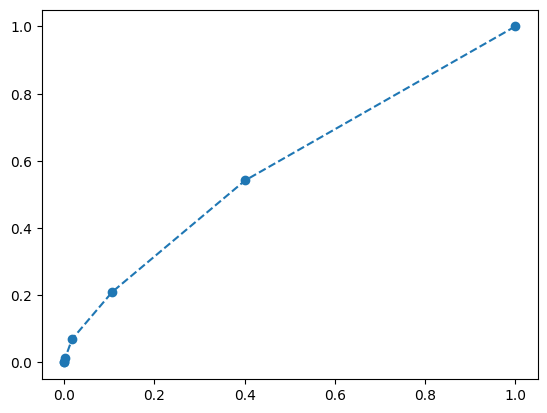

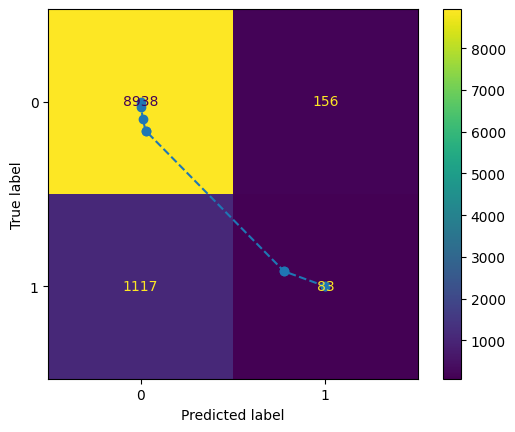

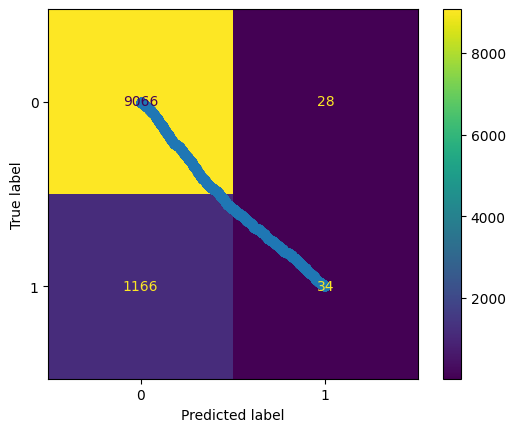

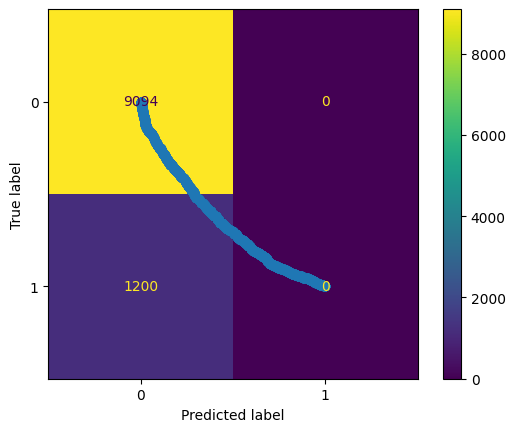

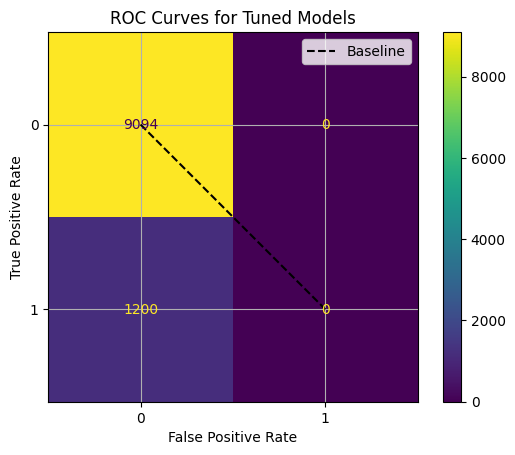

Tuned Model Comparison Results:
                Model                               Best Params Fit Time  \
1        DecisionTree  {'max_depth': 3, 'min_samples_split': 2}    0.24s   
2                 SVM              {'C': 1, 'kernel': 'linear'}   271.3s   
3  LogisticRegression           {'C': 1, 'solver': 'liblinear'}     0.4s   
0                 KNN  {'n_neighbors': 5, 'weights': 'uniform'}  152.93s   

   Accuracy   ROC_AUC        F1  Precision    Recall  
1  0.884010  0.620345  0.053883   0.548387  0.028333  
2  0.883427  0.542376  0.000000   0.000000  0.000000  
3  0.883427  0.655257  0.000000   0.000000  0.000000  
0  0.876336  0.585561  0.115358   0.347280  0.069167  


In [ ]:
# Transform data using column_transformer
X_train_simple = column_transformer.transform(X_train)
X_test_simple = column_transformer.transform(X_test)

# Feature engineering: Decide if we should keep the gender feature
# Example: Remove gender if it's not strongly correlated with the target
# Uncomment and modify as necessary
# X_train_simple = pd.DataFrame(X_train_simple).drop(columns=['gender'], errors='ignore')
# X_test_simple = pd.DataFrame(X_test_simple).drop(columns=['gender'], errors='ignore')

# Models to tune
models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [3, 5], 'min_samples_split': [2]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [1], 'kernel': ['linear']}
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'C': [1], 'solver': ['liblinear']}
    }
}

# Results DataFrame for tuned models
tuned_results = []

for model_name, config in models.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', verbose=1)
    start = time.time()
    grid_search.fit(X_train_simple, y_train)
    stop = time.time()

    best_model = grid_search.best_estimator_
    fit_time = str(round(stop - start, 2)) + 's'

    # Predict and calculate scores
    y_hat = best_model.predict(X_test_simple)
    y_hat_probs = best_model.predict_proba(X_test_simple) if hasattr(best_model, 'predict_proba') else None

    model_scores = classification_report(y_test, y_hat, output_dict=True)
    roc_score = roc_auc_score(y_test, y_hat_probs[:, 1]) if y_hat_probs is not None else None

    # Print performance metrics
    print(f"Classification Report for {model_name} (Tuned):")
    print(classification_report(y_test, y_hat))
    if roc_score is not None:
        print(f"ROC_AUC Score for {model_name} (Tuned) = {roc_score}")

    # Display ROC curve if applicable
    if y_hat_probs is not None:
        fpr, tpr, _ = roc_curve(y_test, y_hat_probs[:, 1])
        plt.plot(fpr, tpr, '--o', label=f'{model_name} (Tuned) ROC Curve')

    ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

    # Add key results to tuned_results
    tuned_results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Fit Time': fit_time,
        'Accuracy': accuracy_score(y_test, y_hat),
        'ROC_AUC': roc_score if roc_score is not None else 'N/A',
        'F1': f1_score(y_test, y_hat),
        'Precision': precision_score(y_test, y_hat),
        'Recall': recall_score(y_test, y_hat)
    })

# Finalize the ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.legend()
plt.title('ROC Curves for Tuned Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

# Display the tuned results DataFrame
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print("Tuned Model Comparison Results:")
print(tuned_results_df)


##### Questions